# Simulation

**Librairies**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Une fonction de répartition (aussi appelée fonction de distribution cumulative, ou CDF en anglais pour Cumulative Distribution Function) est une fonction qui décrit la probabilité qu'une variable aléatoire prenne une valeur inférieure ou égale à un certain seuil.

La fonction de répartition de la loi d'une variable aléatoire $X$ peut être approchée grâce à une suite $(x_n)$ de réalisations d’un échantillon de même loi que $X$, en remarquant que :

$$
F_X(t) = P(X \leq t) = \lim_{n \to +\infty} \frac{1}{n} \sum_{k=1}^{n} \chi_t(x_k)
$$

où $\chi_t(x)$ est la fonction indicatrice de l’intervalle $]-\infty, t]$ (c’est-à-dire que $\chi_t(x) = 1$ si $x \leq t$, sinon $\chi_t(x) = 0$).


Si le vecteur X contient les réalisations, on pourra utiliser les commandes suivantes pour avoir le nombre de réalisations inférieures ou égale à t

In [8]:
X = [1.2, 3.5, 0.7, 4.1, 2.8, 3.0, 1.5]

# Seuil
t = 2.5

# --- Méthode 1
count1 = len([x for x in X if x <= t])
print("Méthode 1 (maths appli) :", count1)

# --- Méthode 2
X_np = np.array(X)
count2 = np.sum(X_np <= t) # sum des True de X_np <= t = [ True False  True False ]
print("Méthode 2 (NumPy) :", count2)

Méthode 1 (maths appli) : 3
Méthode 2 (NumPy) : 3


**Pour estimer $P(X \leq t)$ :**

In [ ]:
# --- Méthode 1
p1 = len([x for x in X if x <= t]) / len(X)

# --- Méthode 2
p2 = np.sum(X_np <= t) / len(X)

# --- Affichage amélioré
print(f"Seuil t = {t}")
print(f"Méthode 1 (maths appli)     : P(X ≤ t) = {p1:.4f}")
print(f"Méthode 2 (NumPy vectorisé) : P(X ≤ t) = {p2:.4f}")

Seuil t = 2.5
Méthode 1 (maths appli)     : P(X ≤ t) = 0.4286
Méthode 2 (NumPy vectorisé) : P(X ≤ t) = 0.4286


### Fonction de répartition empirique

La fonction ainsi obtenue est appelée **fonction de répartition empirique** de $X$.
On peut tracer la courbe de cette fonction en prenant une subdivision régulière de $N$ points dans un intervalle $[a, b]$.

≈ 68.6% des valeurs dans [μ - σ, μ + σ]
≈ 94.9% des valeurs dans [μ - 2σ, μ + 2σ]
≈ 99.6% des valeurs dans [μ - 3σ, μ + 3σ]


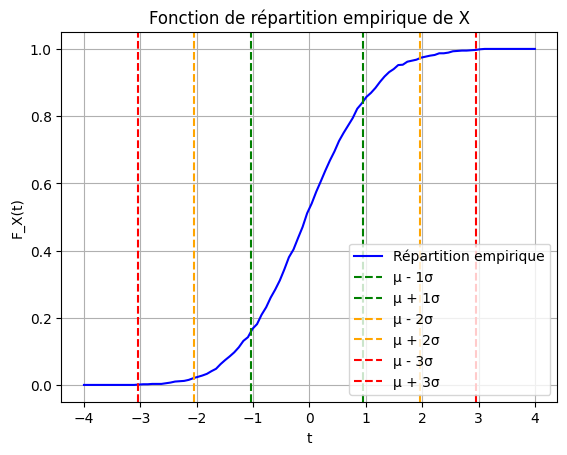

In [16]:
# Exemple : X suit une loi normale
X = np.random.normal(loc=0, scale=1, size=1000)

# Moyenne et écart-type
mu = np.mean(X)
sigma = np.std(X)

# Proportions dans 1σ, 2σ, 3σ autour de la moyenne
p1 = np.mean((X >= mu - sigma) & (X <= mu + sigma))
p2 = np.mean((X >= mu - 2*sigma) & (X <= mu + 2*sigma))
p3 = np.mean((X >= mu - 3*sigma) & (X <= mu + 3*sigma))

print(f"≈ {p1*100:.1f}% des valeurs dans [μ - σ, μ + σ]")
print(f"≈ {p2*100:.1f}% des valeurs dans [μ - 2σ, μ + 2σ]")
print(f"≈ {p3*100:.1f}% des valeurs dans [μ - 3σ, μ + 3σ]")

# Paramètres de tracé
a, b, N = -4, 4, 100
T = np.linspace(a, b, N)

# --- Répartition empirique (méthode rapide)
F = [np.sum(X <= t) / len(X) for t in T]

# Tracé
plt.plot(T, F, label="Répartition empirique", color='blue')

# Tracer les lignes verticales aux limites ±σ, ±2σ, ±3σ
for k, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(mu - k*sigma, linestyle='--', color=color, label=f"μ - {k}σ")
    plt.axvline(mu + k*sigma, linestyle='--', color=color, label=f"μ + {k}σ")

plt.title("Fonction de répartition empirique de X")
plt.xlabel("t")
plt.ylabel("F_X(t)")
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### Comparaison avec la fonction de répartition théorique

Si la loi de $X$ est connue (ex. loi normale), on peut comparer la courbe empirique avec la vraie fonction de répartition.

Pour une loi normale $\mathcal{N}(0, 1)$, on a :

$$
f_X(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2}
$$

Donc la fonction de répartition est :

$$
F_X(t) = \int_{-\infty}^t \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2} \, dx
$$

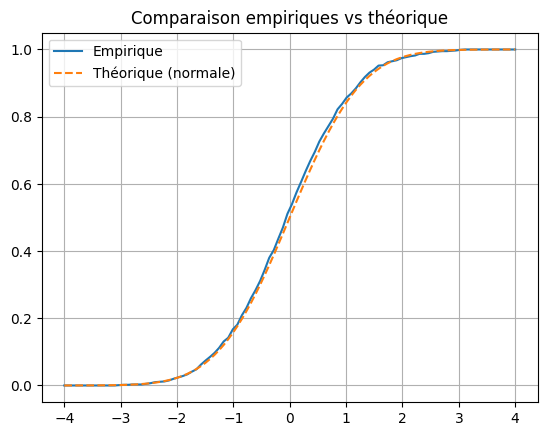

In [17]:
F_theo = norm.cdf(T)

plt.plot(T, F, label="Empirique")
plt.plot(T, F_theo, '--', label="Théorique (normale)")
plt.legend()
plt.title("Comparaison empiriques vs théorique")
plt.grid(True)
plt.show()